# 
In this dataset you have to predict that customer is exited or not based on various 
factors given in dataset.

Dataset : Churn.csv
Steps to follow:
1. Do Proper EDA.
2. Drop Unnecessary Columns.
3. convert Categorical columns into numerical columns.

Prepare model by using Decision Tree, Random Forest & Calculate Accuracy by
confusion matrix, Calculate accuracy score, precision score, recall score, f1 score.

# import libraries 

In [66]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# load the data

In [67]:
df = pd.read_csv('./Churn.csv')
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# EDA

In [68]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [70]:
df.shape

(10000, 14)

In [71]:
df1 = df.drop(['RowNumber', 'CustomerId' ,'Surname'], axis=1)
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [72]:
from sklearn.preprocessing import LabelEncoder

# create an encoder object
encoder = LabelEncoder()

# encode the State to numeric values
df1['Geography'] = encoder.fit_transform(df1['Geography'])

In [73]:
df1['Geography']

0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Geography, Length: 10000, dtype: int64

In [74]:
from sklearn.preprocessing import LabelEncoder

encoder_gender = LabelEncoder()

df1['Gender'] = encoder_gender.fit_transform(df1['Gender'])

In [75]:
df['Gender']

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, Length: 10000, dtype: object

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [77]:
df1.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


### split the data into x and y

In [78]:
x = df1[['Gender' , 'Age', 'Balance' ,'IsActiveMember' , 'EstimatedSalary']]
y = df1['Exited']

## split the data inyo train and test set 

In [79]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , random_state=123456)


## train the models 


In [81]:
def train_model_dt():
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(max_depth=3)
    model.fit(x_train , y_train)
    return model 

In [82]:
def train_random_forest():
    from sklearn.ensemble import RandomForestClassifier

    model = RandomForestClassifier(max_depth=3)
    model.fit(x_train , y_train)
    return model

## evaluate the model

In [83]:
def evaluate_model(model , model_name):
    from sklearn.metrics import confusion_matrix, accuracy_score , precision_score ,recall_score , f1_score

    y_pred = model.predict(x_test)
    y_true = y_test

    # get the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(f"confusion matrix: ")
    print(cm)

    accuracy = accuracy_score(y_true , y_pred)
    precision = precision_score(y_true , y_pred)
    recall = recall_score(y_true, y_pred)
    f1 =f1_score(y_true, y_pred)

    return model_name ,cm,  accuracy , precision , recall ,f1

In [84]:
models = [
    
    (train_model_dt(), 'Decision Tree', (0, 0)),
    (train_random_forest(), 'Random Forest', (0, 1))
]

In [85]:
results = []
for (model, model_name, _) in models:
    results.append(evaluate_model(model, model_name))

confusion matrix: 
[[1964   17]
 [ 428   91]]
confusion matrix: 
[[1947   34]
 [ 412  107]]


In [86]:
result_df = pd.DataFrame(results, columns=['Algorithm','confusion metrix', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
result_df

,Algorithm,confusion metrix,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,"[[1964, 17], [428, 91]]",0.8220,0.842593,0.175337,0.290271
1,Random Forest,"[[1947, 34], [412, 107]]",0.8216,0.758865,0.206166,0.324242


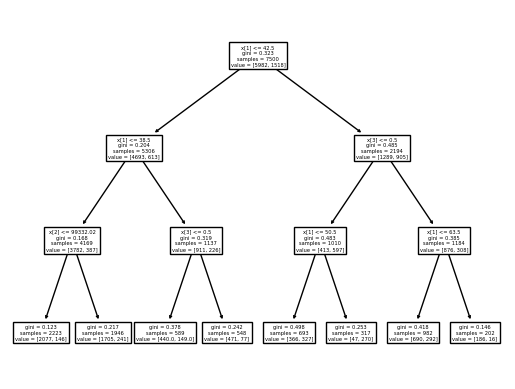

In [87]:
from sklearn.tree import plot_tree
result = plot_tree(models[0][0])